<a href="https://colab.research.google.com/github/1024andrew/colab_ML-DL_practice/blob/main/1_KNN%EB%B6%84%EB%A5%98_%2B_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
#길이와 무게를 합쳐서 fish_data 만들기
import numpy as np

#이 과정에서 일반 리스트 2개를 합쳐서 하나의 넘파이 배열을 만든다.
fish_data = np.column_stack((fish_length, fish_weight))

In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [ ]:
#훈련 세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state=42)

In [ ]:
#머신러닝 훈련시키기
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

kn.fit(train_input,train_target)
kn.score(test_input, test_target)

1.0

<function matplotlib.pyplot.show(close=None, block=None)>

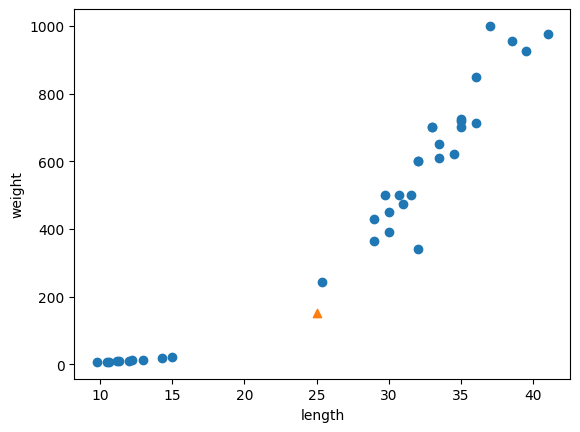

In [ ]:
#그래프로 확인하기
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150, marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show

In [ ]:
#이웃한 점들의 거리와 인덱스를 계산한다.
distance, indexes = kn.kneighbors([[25,150]])

<function matplotlib.pyplot.show(close=None, block=None)>

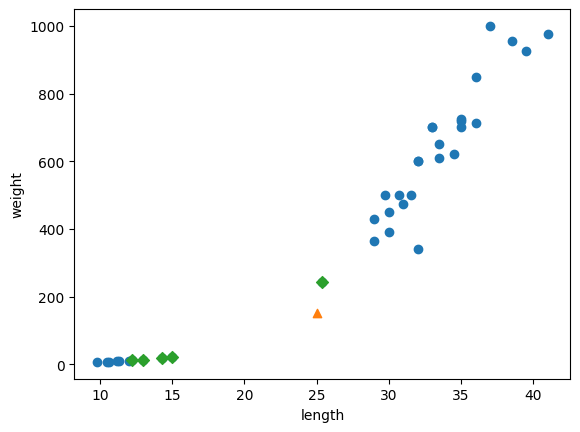

In [ ]:
#위에서 계산한 인덱스를 이용해서 어떤 점들이 이웃한지 그래프로 확인한다.

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150, marker = "^")
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker = "D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

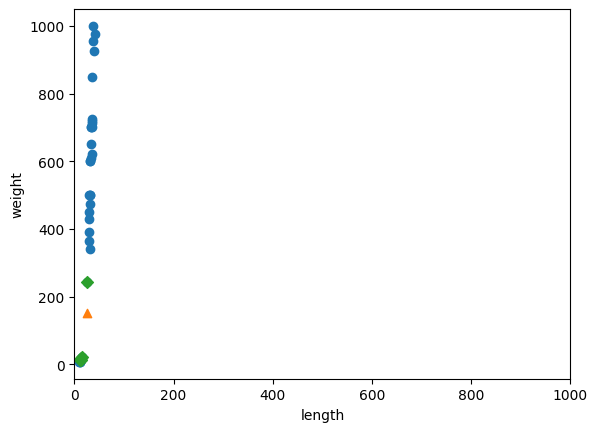

In [ ]:
#x와 y의 범위를 맞춰서 그래프를 그리면 다음과 같다.
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.xlim(0,1000)
plt.scatter(25,150, marker = "^")
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker = "D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show


In [ ]:
#데이터 전처리 필요(x와 y의 스케일이 다르다)

In [ ]:
#넘파이 배열의 평균과 표준편차를 계산한다.
mean = np.mean(train_input,axis =0)
std = np.std(train_input, axis = 0)

In [ ]:
mean, std

(array([ 27.29722222, 454.09722222]), array([  9.98244253, 323.29893931]))

In [ ]:
#표준화하여 배열을 다시 그래프로 그린다.
train_scale = (train_input - mean)/std

#표시하려는 값 역시 표준화를 해야함(*훈련 세트를 표준화한 값 그대로*)
test_scale = ([25,150]-mean)/std

In [ ]:
#이 부분 빼먹어서 해맸음 -> 스케일을 조정한 데이터에 다시 머신을 학습시켜야함
kn.fit(train_scale, train_target)

KNeighborsClassifier()

<function matplotlib.pyplot.show(close=None, block=None)>

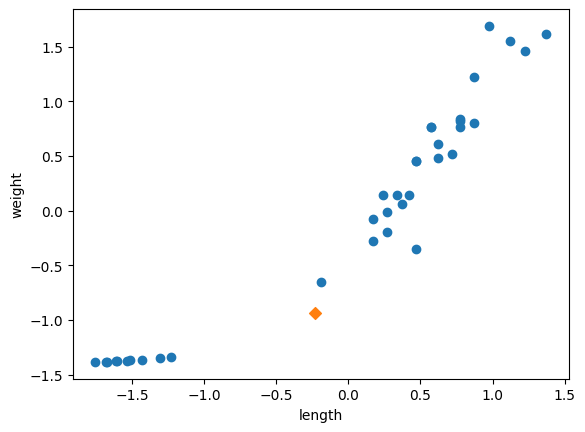

In [ ]:

plt.scatter(train_scale[:,0],train_scale[:,1])
plt.scatter(test_scale[0],test_scale[1], marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show

In [ ]:
#스케일을 조정한 데이터에서 거리와 인덱스를 다시 계산한다.
distance, indexes = kn.kneighbors([test_scale])

<function matplotlib.pyplot.show(close=None, block=None)>

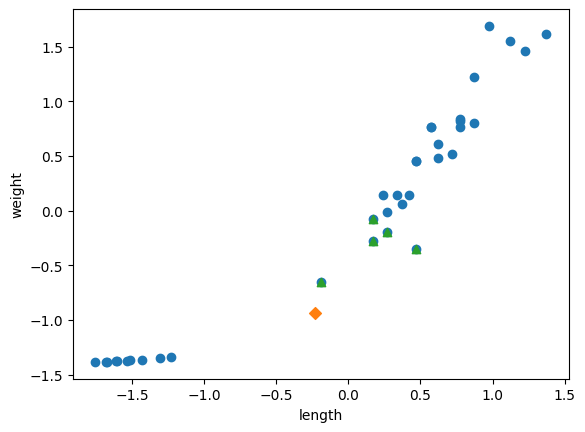

In [ ]:

plt.scatter(train_scale[:,0],train_scale[:,1])
plt.scatter(test_scale[0],test_scale[1], marker="D")
plt.scatter(train_scale[indexes,0],train_scale[indexes,1],marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show